![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia e polinômios originais**: Luan Lima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 3: Analisando o método de Newton

## Questão 1: Implementação e testes simples

Implemente abaixo a função `newton_pts`, que executa o método de Newton,
retornando todos os pontos percorridos pelo algoritmo até atingir algum critério de parada.
Utilize como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def condicao_parada(f,x,xtol,ytol,step,niter,maxiter):
    return (np.abs(f(x))<ytol) or (np.abs(step)<xtol) or (niter>maxiter)
def condicao_parada_bissecao(a,b,xtol,niter,maxiter,ytol,f):
    return abs(a - b) < xtol or niter == maxiter or np.abs( f((a+b)/2)  ) < ytol
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    stop = False
    niter = 0
    pts = []
    pts.append(x)
    while(not stop):
        step = f(x)/df(x)
        x -= step
        stop = condicao_parada(f,x,xtol,ytol,step,niter,maxiter)
        pts.append(x)
        niter += 1
    return pts     

def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    num_iter = 0
    pts = []
    #supoe fb > fa
    if(f(a) > f(b)):
        aux = b
        b = a
        a = aux
    fcalls = 2
    while(not condicao_parada_bissecao(a,b,xtol,num_iter,maxiter,ytol,f)):
        m = (a+b)/2
        pts.append(m)
        if(f(m) > 0):
            b = m
        else:
            a = m   
        num_iter += 1
        fcalls += 1
    pts.append((a+b)/2)
    return pts

In [3]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.isclose(zs[-1], 0)
assert 5 <= len(zs) <= 6

In [4]:
def f(x): return np.sin(x)
def df(x): return np.cos(x)

zs = newton_pts(f,df,1)
assert np.abs(zs[-2]-zs[-3]) >= 1e-8

In [5]:
def make_f(a):
    def f(x):
        return np.exp(x)-a
    return f
def df(x): return np.exp(x)

for a in range(2,11):
    f = make_f(a)
    zs = newton_pts(f,df,0,ytol=0)
    assert np.isclose(zs[-1], np.log(a))
    assert np.abs(zs[-1]-zs[-2]) <= 1e-8
    assert np.abs(zs[-2]-zs[-3]) >= 1e-8

## Questão 2: Uma equação trigonométrica

Vamos utilizar os nossos métodos para achar uma solução para uma equação difícil de resolver "na mão":

$$ \sin(x^2) = \cos(x)^2. $$

In [6]:
def f1(x): return np.sin(x**2)
def f2(x): return np.cos(x)**2

Faça um gráfico das funções $\sin(x^2)$ e $\cos(x)^2$ abaixo.

Com a ajuda do gráfico, defina um ponto inicial $x_0$
para o método de Newton encontrar a primeira raiz positiva da equação.

Text(0, 0.5, 'y')

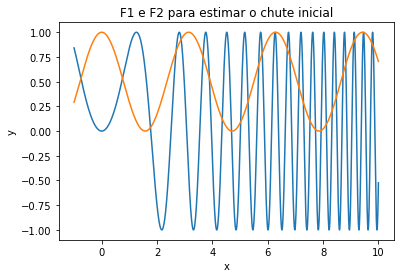

In [7]:
ax = plt.gca()
x = np.arange(-1,10,0.001)
y_f1 = f1(x)
y_f2 = f2(x)
ax.plot(x,y_f1,label="f1")
ax.plot(x,y_f2,label="f2")
ax.set_title("F1 e F2 para estimar o chute inicial")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [8]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Faça um gráfico mostrando a evolução do erro em $y$, em função do número de passos efetuados.

Text(0.5, 0, 'niter')

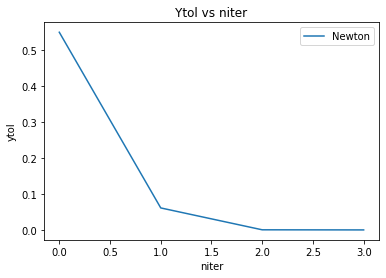

In [9]:
def f3(x):
    return (f1(x) - f2(x))
def df3(x):
    return (np.cos(x**2)*2*x) - (-2*np.cos(x)*np.sin(x))
    
pts = newton_pts(f3,df3,1)
pts_b = bissecao_pts(f3,1.5,0)
y_f3 = [f3(pt) for pt in pts]
#y_f3_b = [f3(pt) for pt in pts_b]
ax = plt.gca()
ax.plot(np.arange(len(pts)),np.abs(y_f3),label="Newton")
#ax.plot(np.arange(len(pts_b)),np.abs(y_f3_b),label="Bisseção")
ax.legend()
ax.set_title("Ytol vs niter")
ax.set_ylabel("ytol")
ax.set_xlabel("niter")

In [10]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Text(0.5, 0, 'niter')

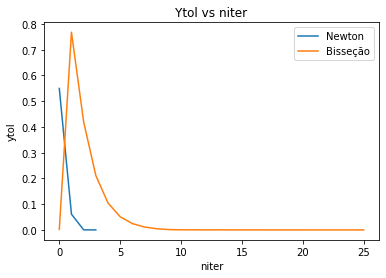

In [11]:
pts_b = bissecao_pts(f3,1.5,0)
y_f3_b = [f3(pt) for pt in pts_b]
ax = plt.gca()
ax.plot(np.arange(len(pts)),np.abs(y_f3),label="Newton")
ax.plot(np.arange(len(pts_b)),np.abs(y_f3_b),label="Bisseção")
ax.legend()
ax.set_title("Ytol vs niter")
ax.set_ylabel("ytol")
ax.set_xlabel("niter")

In [12]:
df3(pts[-1])

2.2669541945364036

Text(0.5, 0, 'x')

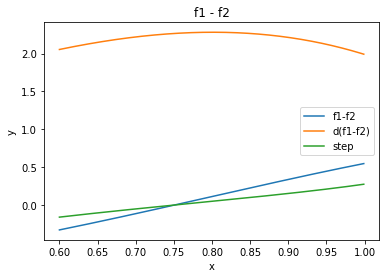

In [13]:
x = np.arange(0.6,1,0.001)
y_f3 = f3(x)
d_x = df3(x)
step = y_f3/d_x
ax = plt.gca()
ax.plot(x,y_f3,label="f1-f2")
ax.plot(x,d_x,label="d(f1-f2)")
ax.plot(x,step,label="step")
ax.legend()
ax.set_title("f1 - f2")
ax.set_ylabel("y")
ax.set_xlabel("x")

Text(0.5, 1.0, 'Razão de convergencia')

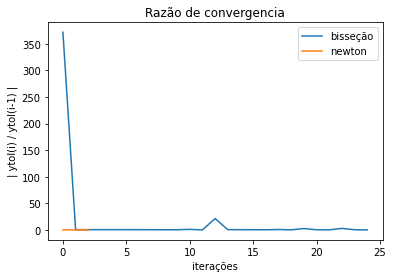

In [29]:
ax = plt.gca()
r_f = [np.abs(y_f3_b[i]/y_f3_b[i-1]) for i in range(1,len(y_f3_b))]
r_g = [np.abs(y_f3[i]/y_f3[i-1]) for i in range(1,len(y_f3))]
ax.plot(np.arange(len(y_f3_b) - 1), r_f, label="bisseção")
ax.plot(np.arange(len(y_f3) - 1), r_g, label="newton")
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("| ytol(i) / ytol(i-1) |")
ax.set_title("Razão de convergencia")

Comente o resultado.

Vemos que o algoritmo de Newton converge para a raiz 0.7509. Um fato importante a se notar é que a derivada perto desse ponto atinge seu máximo local, no entanto o tamanho do passo é extremamente pequeno dado que a f(x) também é pequena em torno dele. O erro em Y a cada iteração decai aproximadamente de forma exponencial: 5.5e-1, 6.1e-2, 3.1e-4, 5.7e-9. Comparando com a bisseção, vemos que o algoritmo de Newton convergiu muito mais rápido, embora a taxa de convergência tendem ao mesmo valor.

Você acha que seria uma boa ideia fazer um gráfico do erro em $x$ nesse caso?
Porquê?

Text(0.5, 0, 'niter')

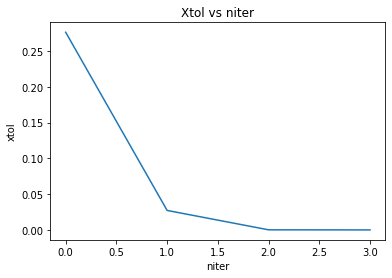

In [14]:
pts = newton_pts(f3,df3,1)
y_f3 = [f3(pt)/df3(pt) for pt in pts]
ax = plt.gca()
ax.plot(np.arange(len(pts)),np.abs(y_f3))
ax.set_title("Xtol vs niter")
ax.set_ylabel("xtol")
ax.set_xlabel("niter")

Não conhecemos a priori qual a raiz, logo calcular o erro X simplesmente fazendo |X - raiz| não faz muito sentido. No entanto podemos calcular o tamanho passo, uma vez que conforme X se aproxima da raiz ele tende a decrescer a 0 (no caso em que o metódo de Newton converge, tal como o exemplo acima).

## Questão 3: Polinômios em `Python`

Para não precisar ficar implementando polinômio por polinômio,
implemente uma função `cria_poli(coefs)` que retorna uma (outra) função `poli(x)`,
que computa o valor do polinômio

$p(X)=$ `coefs[0]`  $+$ `coefs[1]` $X+$ `coefs[2]` $X^2+\dots+$ `coefs[-1]` $X^n$

em $X=$`x`.
As funções de polinômios do `numpy` (`poly1d`, `polyval`, `polyder`) podem lhe ser úteis :-)

No mesmo espírito, crie a função `cria_derivada_poli(coefs)`,
que retorna uma função `derivada_poli(x)` que computa a derivada do polinômio acima em $X=$`x`. 

In [15]:
def cria_poli(l):
    def poli(x):
        return np.sum([l[i]*(x**i) for i in range(len(l))])
    return poli

def cria_derivada_poli(l):
    def dpoli(x):
        return np.sum([i*l[i]*(x**(i-1)) for i in range(1,len(l))])
    return dpoli

In [16]:
p = cria_poli([1,2,3,4,5,6,7,8])
assert p(0) == 1
assert p(1) == 8*9/2

In [17]:
for n in range(2,11):
    dp = cria_derivada_poli(np.linspace(0,n,n+1))
    assert dp(1) == np.sum([c**2 for c in range(n+1)])

In [18]:
np.random.seed(21)
for n in range(2,6):
    coefs = np.random.rand(n)*100
    x = np.random.rand()*10
    p = cria_poli(coefs)
    dp = cria_derivada_poli(coefs)
    assert np.isclose(p(x+0.002), p(x)+0.002*dp(x))

## Questão 4: Achando as raízes de um polinômio

Defina o polinômio
$p(x) = 1 - \frac{1}{2}x - 4x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5$,
e faça um gráfico que permita visualizar satisfatoriamente a região onde se encontram as suas raízes.

Deduza um intervalo $[a,b]$ que contenha todas as raízes reais de $p(x)$.

In [19]:
p = cria_poli([1,-1/2,-4,1/2,3/2,1/2])
dp = cria_derivada_poli([1,-1/2,-4,1/2,3/2,1/2])

Text(0, 0.5, 'y')

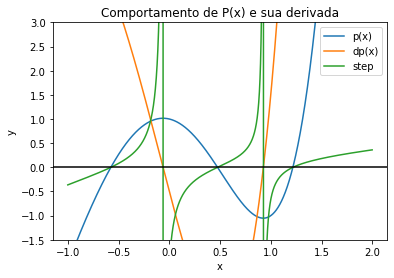

In [20]:
x = np.arange(-1,2,0.001)
y = np.array([p(a) for a in x])
d_x = np.array([dp(a) for a in x])
step = y/d_x
ax = plt.gca()
ax.plot(x,y,label="p(x)")
ax.plot(x,d_x,label="dp(x)")
ax.plot(x,step,label="step")
ax.legend()
plt.axhline(y=0,color='black',linestyle='-')
ax.set_ylim(-1.5,3)
ax.set_title("Comportamento de P(x) e sua derivada")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [21]:
x[(abs(y)<0.01)]

array([-0.578, -0.577, -0.576, -0.575, -0.574, -0.573,  0.473,  0.474,
        0.475,  0.476,  0.477,  0.478,  1.217,  1.218])

Divida o intervalo $[a,b]$ em um número bem grande de pontos.

Faça um gráfico demonstrando o número de iterações necessárias para que o método de Newton convirja,
tendo cada ponto do intervalo como valor inicial.

Text(0, 0.5, 'Niter')

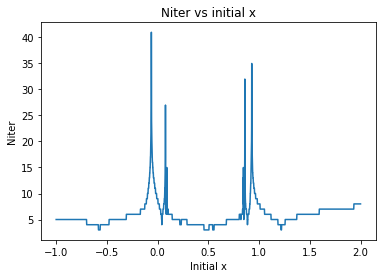

In [22]:
y = np.array([len(newton_pts(p,dp,x_i)) for x_i in x])
ax = plt.gca()
ax.plot(x,y)
ax.set_title("Niter vs initial x")
ax.set_xlabel("Initial x")
ax.set_ylabel("Niter")

In [23]:
x[y>20]

array([-0.065, -0.064, -0.063, -0.062, -0.061, -0.06 , -0.059, -0.058,
        0.077,  0.859,  0.926,  0.927,  0.928])

In [24]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, faça o gráfico das raizes para as quais o método converge,
em função do ponto inicial.

Text(0, 0.5, 'Raiz')

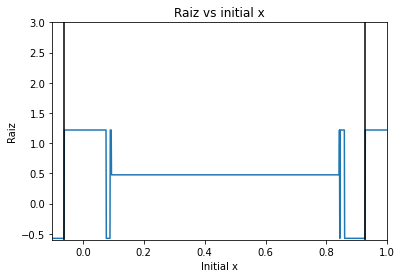

In [25]:
y = [newton_pts(p,dp,x_i)[-1] for x_i in x]
ax = plt.gca()
ax.plot(x,y)
plt.axvline(x=-0.062,color='black',linestyle='-')
plt.axvline(x=0.927,color='black',linestyle='-')
ax.set_xlim(-0.1,1)
ax.set_ylim(-0.6,3)
ax.set_title("Raiz vs initial x")
ax.set_xlabel("Initial x")
ax.set_ylabel("Raiz")

Comente os gráficos.

A partir do gráfico "Comportamento de P(x) e sua derivada" percebemos que há 4 assíntotas para o tamanho do passo, que invertem de sinal, de acordo com o valor da derivada e de P(x). Importante notar que essas assíntotas se originam quando a derivada é aproximadamente 0 (isto é perto dos pontos "-0.062" e "0.927") e como p(x) não é pequeno suficiente nesses pontos, o tamanho do passo "explode". Não a toa que quando o ponto inicial coincide com essas assíntotas o número de iterações necessárias aumentam bastante. 
<ul>
<li> Vejamos a 1ª assíntota quando X inicial, $X_0$, é um pouco menor que -0.062. Ela é positiva dado que a derivada e P(X) são positivas. Isso faz com que $X_1$ se desvie bastante para a esquerda devido a operação $X_1 = X_0 - step$. Logo, para $X_0$ situado a esquerda de -0.062 o algoritmo converge para a raiz $x = -0.575$. 
<li> Vejamos a 2ª assíntota, quando $X_0$ é infinitesimalmente maior que -0.062. Ela é negativa dado que a derivada é negativa e P(x) positivo. Isso faz com que $X_1$ se desvie bastante para a direita. Logo, para $X_0$ situado a direita de -0.062 o algoritmo converge para a raiz $x=1.217$. 
    <p>No entanto temos ainda 3 casos possíveis, dependendo do quão distante estamos de "-0.062" para a direita:
        <ol>
            <li> Há um ponto, digamos "a" $a \in (-0.062,0.2)$,  em que o tamanho do passo é tal que $X_1$ coincide com a 3ª assíntota, que é positiva. Com isso é possível que $X_2$ acabe indo muito para a esquerda e o algoritmo converge para $x=-0.575$ ou até mesmo gere algum ciclo. </li>
            <li> Caso em um outro ponto inicial $a+\epsilon$(sendo $\epsilon$ um valor pequeno suficiente) o tamanho do passo for tal que $X_1$ coincide com a 4ª assíntota, que é negativa, então é possível que $X_2$ acabe indo muito para a direita e o algoritmo converge para $x=1.217$.</li>
            <li> Seja ainda $\delta$ um valor suficientemente pequeno tal que $a+\delta > a+\epsilon$ e $a \in (-0.062,0.2)$. Considere ainda que o tamanho do passo em $a+\delta$ seja o suficiente para que $X_1$ caia antes da 3ª assíntota. Nesse caso o algoritmo converge aproximadamente para $x=0.475$</li>
       </ol>
<li> Vejamos a 3ª assíntota, quando X inicial é um pouco menor que 0.927. Ela é positiva dado que a derivada e P(x) são ambas negativas. Isso faz com que $X_1$ se desvie bastante para a esquerda devido a operação $X_1 = X_0 - step$. No entanto para determinar para qual raiz irá convergir dependerá do tamanho do passo nesse ponto, de forma similar como foi discutido para a 2ª assíntota. </li>
<li> Vejamos a 4ª assíntota quando X inicial, $X_0$, é um pouco maior que 0.927. Ela é negativa dado que a derivada é positiva e P(x) negativa. Isso faz com que $X_1$ se desvie bastante para a direita. Logo, para $X_0$ situado a direita de 0.927 o algoritmo converge para a raiz $x=1.217$. </li>
</ul>

## Questão 5: Outro polinômio
Repita o mesmo estudo para o polinômio

$$p(x) = 1 - \frac{1}{2}x - \frac{3}{2}x^2 + \frac{1}{2}x^3 + \frac{3}{2}x^4 + \frac{1}{2}x^5. $$

Gráfico

Text(0, 0.5, 'y')

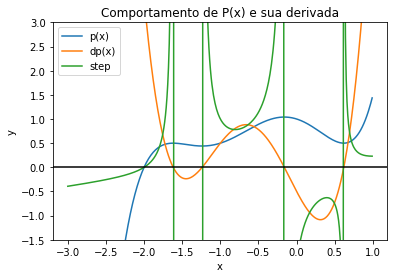

In [26]:
p = cria_poli([1,-1/2,-3/2,1/2,3/2,1/2])
dp = cria_derivada_poli([1,-1/2,-3/2,1/2,3/2,1/2])
x = np.arange(-3,1,0.01)
y = np.array([p(a) for a in x])
d_x = np.array([dp(a) for a in x])
step = y/d_x
ax = plt.gca()
ax.plot(x,y,label="p(x)")
ax.plot(x,d_x,label="dp(x)")
ax.plot(x,step,label="step")
ax.legend()
plt.axhline(y=0,color='black',linestyle='-')
ax.set_ylim(-1.5,3)
ax.set_title("Comportamento de P(x) e sua derivada")
ax.set_xlabel("x")
ax.set_ylabel("y")

Iterações para encontrar as raízes, e raízes encontradas.

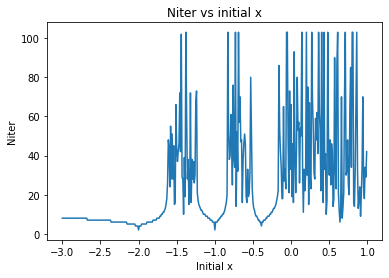

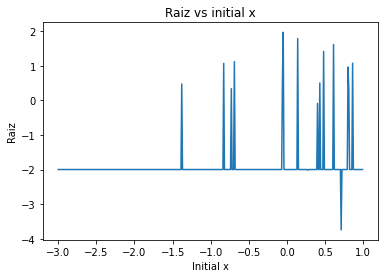

In [27]:
y = [len(newton_pts(p,dp,x_i)) for x_i in x]
ax = plt.gca()
ax.plot(x,y)
ax.set_title("Niter vs initial x")
ax.set_xlabel("Initial x")
ax.set_ylabel("Niter")
plt.show()
y = [newton_pts(p,dp,x_i)[-1] for x_i in x]
ax = plt.gca()
ax.plot(x,y)
ax.set_title("Raiz vs initial x")
ax.set_xlabel("Initial x")
ax.set_ylabel("Raiz")
plt.show()

O que mudou dessa vez? Que conclusão você tira disso?

Dessa vez a derivada da função possui uma quantidade de raízes maior, levando ao aparecimento de várias assíntotas para o valor de step. Isso aumenta muito a probabilidade de ocorrer ciclos, e possivelmente levar a não convergência do algoritmo. No entanto, vendo o gráfico das raízes para as quais o algoritmo convergiu, vemos que no intervalo para $x<-1.5$ todos convergiram. Vemos também que nos intervalos seguintes o algoritmo convergiu quando o step inicial era bem comportado, fora do comportamento assimptótico. Logo a conclusão que chegamos é que, no caso de termos a derivada ter muitas raízes, uma análise mais cuidadosa do intervalo em que uma possível raiz se encontra é necessária, pois caso contrário teremos uma probabilidade maior do algoritmo entrar em ciclos. Do contrário, se escolhêssemos um intervalo entre -2.5 e -1.5 veríamos que o algoritmo é bem comportado e todos os pontos convergem para a mesma (única) raiz, e que nesse caso ele não fica perdido indo para várias direções.  